## **<span style="color:gray; font-family:Garamond;"> Final Project - Group 45**
# <span style="color:black; font-family:Garamond;"> Journalists Killed Worldwide
### **<span style="color:black; font-family:Garamond;"> Name Of Students:**
**<span style="color:black; font-family:Garamond;">Lauren Mantzur<br>**
**<span style="color:black; font-family:Garamond;">Orin Karavani<br>**
**<span style="color:black; font-family:Garamond;">Omer Levi**


<div>
<img src="https://www.ifj.org/fileadmin/_processed_/e/5/csm_battleface-ifj-press-4_8a8191d543.jpg" width="800"/>
<figcaption align="center">
    <small> </small>
</figcaption>
</div> 


## **<span style="color:gray; font-family:Garamond;"> Final Project - Group 45**

In [33]:
from IPython.display import display, HTML
#display(HTML("<img src='https://raw.githubusercontent.com/lauMren/Journalists-Project/main/%D7%A6%D7%99%D7%9C%D7%95%D7%9D%20%D7%9E%D7%A1%D7%9A%202024-06-15%20010310.png' style='max-width:200%; height:200%;'>"))
display(HTML("""
<style>
.img-container {
    width: 100%; /* רוחב מלא של האזור */
    height: 800px; /* גובה קבוע של האזור */
    overflow: hidden; /* אין גלילה אוטומטית */
}

.img-container img {
    width: 100%; /* רוחב מלא של התמונה */
    height: 100%; /* גובה מלא של התמונה */
    object-fit: contain; /* התאמה תואמת של התמונה לגודל שנקבע */
}
</style>
<div class="img-container">
    <img src="https://raw.githubusercontent.com/lauMren/Journalists-Project/main/%D7%A6%D7%99%D7%9C%D7%95%D7%9D%20%D7%9E%D7%A1%D7%9A%202024-06-15%20010310.png">
</div>
"""))

#### <span style="color:navy; font-family:Garamond;"> Introduction     
 
 חשוב----------    לרשום: מה הקובץ שלנו אומר ומאיפה הוא לקוח (קאגל) 

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sklearn as sk

#from sklearn import tree
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.metrics import mean_squared_error
#from sklearn.svm import SVC
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from IPython.display import Image

file_path = r"C:\Users\loren\Desktop\‏‏תיקיה חדשה"
worldmap = gpd.read_file(file_path)
worldmap.head()

url = 'https://raw.githubusercontent.com/lauMren/Journalists-Project/main/cpj.csv'
#define -> name of data = jour
jour = pd.read_csv(url)
jour.head()

,Type,Date,Name,Sex,Country_killed,Organization,Nationality,Medium,Job,Coverage,Freelance,Local_Foreign,Source_fire,Type_death,Impunity_for_murder,Taken_captive,Threatened,Tortured
0,Motive Confirmed,"October 22, 2016",Ali Risan,Male,Iraq,Al-Sumaria TV,Iraqi,"Television, Internet",Camera Operator,War,No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
1,Motive Confirmed,"October 21, 2016",Ahmet Haceroğlu,Male,Iraq,Türkmeneli TV,Iraqi,Television,Producer,"Politics, War",No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
2,Motive Confirmed,"October 2, 2016",Jeroen Oerlemans,Male,Libya,Freelance,Netherlands,"Print, Internet",Photographer,"Politics, War",Yes,Foreign,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
3,Motive Confirmed,"August 14, 2016",Mustafa Said,Male,Iraq,Kurdistan TV,Iraqi,Television,Camera Operator,War,No,Local,Unknown Fire,Crossfire/Combat-Related,NaN,No,No,No\n
4,Motive Confirmed,"August 8, 2016",Shehzad Ahmed,NaN,Pakistan,Aaj News,Pakistani,Television,Camera Operator,"Business, Corruption, Crime, Culture, Human Ri...",No,Local,Political Group,Dangerous Assignment,NaN,No,No,No\n


In [3]:
#name of columns:
shape = jour.shape
print(shape)
jour.columns

(1782, 18)


Index(['Type', 'Date', 'Name', 'Sex', 'Country_killed', 'Organization',
       'Nationality', 'Medium', 'Job', 'Coverage', 'Freelance',
       'Local_Foreign', 'Source_fire', 'Type_death', 'Impunity_for_murder',
       'Taken_captive', 'Threatened', 'Tortured'],
      dtype='object')

<link href="https://fonts.googleapis.com/css2?family=Assistant:wght@400;700&display=swap" rel="stylesheet">
<!-- שינוי הגופן בעברית. לא לגעת! -->

## what i want to check! לא חלק מהקוד- בהמשך שיהיה מסודר

ניתן לראות כי בעיראק יש הכי הרבה הרוגים

פרילנסרים נהרגו יותר

ניתן גם לראות שהרוב נרצחו - לבדוק ע"י מי

רובם לא היו מאויימים

רובם פטורים מעונש מוות - לבדוק מי לא פטור ולנסות להבין למה

לבדוק כמה כן עברו עינויים ולמה.

<div style="text-align: left; direction: rtl;"> נבצע מספר שינויים בדאטה פריים: הוספת קטגוריות ושינויי type 
</div>

In [4]:
# אין לנו נתונים מספריים, כל הקטגוריות מסוג אובייקט לכן נחלץ נתונים בדרכים שונות
# כמות הגברים וכמות הנשים
female = jour[jour['Sex'] == 'Female']
male = jour[jour['Sex'] == 'Male']
Women = len(female)
Man = len(male)

#### add columns:

In [5]:
jour['Date'] = pd.to_datetime(jour['Date'], errors='coerce')
jour['Year'] = jour['Date'].dt.year
jour['Month'] = jour['Date'].dt.month

In [6]:
# פונקציה שמסווגת לפי עונות את העמודה "חודש"-שהוספנו באיטרציה קודמת

def classify_season(Month):
    if Month in [12.0, 1.0, 2.0]:
        return 'Winter'
    elif Month in [3.0, 4.0, 5.0]:
        return 'Spring'
    elif Month in [6.0, 7.0, 8.0]:
        return 'Summer'
    elif Month in [9.0, 10.0, 11.0]:
        return 'Fall'
    else:
        return 'Unknown'

jour['Season'] = jour['Month'].apply(classify_season)

In [7]:
jour['Coverage'] = jour['Coverage'].fillna('').astype(str)
jour['Medium'] = jour['Medium'].fillna('').astype(str)

In [8]:
# separate by comma to make SubCategories

jour['Classify cover'] = jour['Coverage'].apply(lambda x: x.split(', '))
jour['Published'] = jour['Medium'].apply(lambda x: x.split(', '))

In [9]:
#  הפרדה של עמודת הסיקור לקטגוריות מוגדרות ללא פסיקים. אותו כנל על צורת השידור

unique_coverage = set([category for sublist in jour['Classify cover'] for category in sublist])
for category in unique_coverage:
    jour[category] = jour['Classify cover'].apply(lambda x: category in x)


medium = set([form for sublist in jour['Published'] for form in sublist])
for form in medium:
    jour[form] = jour['Published'].apply(lambda x: category in x)

In [10]:
# מיני סקירה על תוכן הדאטה החדש, לצורך נוחות בהמשך

jour.info()
empty = jour.isnull().sum()
print("THE EMPTY DATA:", empty[:23], 'The rest columns are bool')
jour.describe(include = 'object')
jour

# לבסוף נקבל דאטה פריים חדש עם עמודות חדשות

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Type                 1782 non-null   object        
 1   Date                 1708 non-null   datetime64[ns]
 2   Name                 1782 non-null   object        
 3   Sex                  1216 non-null   object        
 4   Country_killed       1781 non-null   object        
 5   Organization         1779 non-null   object        
 6   Nationality          1499 non-null   object        
 7   Medium               1782 non-null   object        
 8   Job                  1210 non-null   object        
 9   Coverage             1782 non-null   object        
 10  Freelance            1217 non-null   object        
 11  Local_Foreign        1217 non-null   object        
 12  Source_fire          1215 non-null   object        
 13  Type_death           1217 non-nul

,Type,Date,Name,Sex,Country_killed,Organization,Nationality,Medium,Job,Coverage,...,Culture,Corruption,Crime,War,Human Rights,Politics,Print,Internet,Radio,Television
0,Motive Confirmed,2016-10-22,Ali Risan,Male,Iraq,Al-Sumaria TV,Iraqi,"Television, Internet",Camera Operator,War,...,False,False,False,True,False,False,False,False,False,False
1,Motive Confirmed,2016-10-21,Ahmet Haceroğlu,Male,Iraq,Türkmeneli TV,Iraqi,Television,Producer,"Politics, War",...,False,False,False,True,False,True,False,False,False,False
2,Motive Confirmed,2016-10-02,Jeroen Oerlemans,Male,Libya,Freelance,Netherlands,"Print, Internet",Photographer,"Politics, War",...,False,False,False,True,False,True,False,False,False,False
3,Motive Confirmed,2016-08-14,Mustafa Said,Male,Iraq,Kurdistan TV,Iraqi,Television,Camera Operator,War,...,False,False,False,True,False,False,False,False,False,False
4,Motive Confirmed,2016-08-08,Shehzad Ahmed,NaN,Pakistan,Aaj News,Pakistani,Television,Camera Operator,"Business, Corruption, Crime, Culture, Human Ri...",...,True,True,True,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,Motive Unconfirmed,1992-08-03,Robinson Joseph,NaN,Haiti,Radio Lumière,NaN,,NaN,,...,False,False,False,False,False,False,False,False,False,False
1778,Motive Unconfirmed,1992-07-03,Ladjid Jade Ladja,NaN,Philippines,Prensa Zamboanga,NaN,,NaN,,...,False,False,False,False,False,False,False,False,False,False
1779,Motive Unconfirmed,1992-06-02,Mecit Akgun,NaN,Turkey,Yeni Ulke,NaN,,NaN,,...,False,False,False,False,False,False,False,False,False,False
1780,Motive Unconfirmed,1992-02-27,Bakshi Tirath Singh,NaN,India,Hind Samachar,NaN,,NaN,,...,False,False,False,False,False,False,False,False,False,False


C:\Users\loren\AppData\Local\Temp\ipykernel_12388\3763718149.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


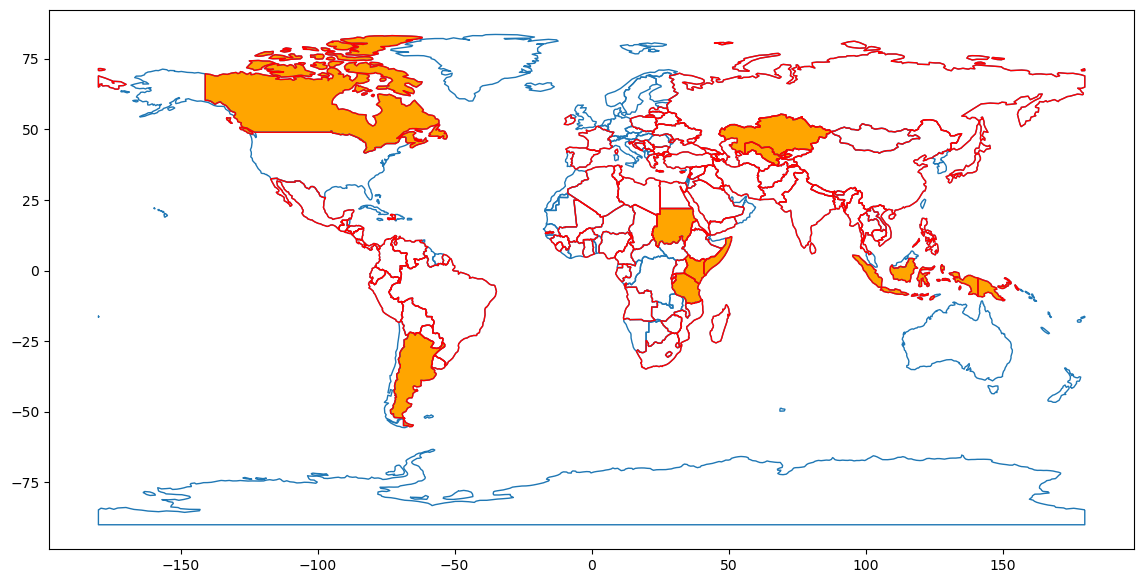

The all countries, Red Lines: ['Iraq' 'Libya' 'Pakistan' 'Yemen' 'Syria' 'Brazil' 'Ukraine' 'Mexico'
 'Turkey' 'Afghanistan' 'India' 'Guinea' 'Somalia' 'France' 'Bangladesh'
 'Ghana' 'Colombia' 'USA' 'Poland' 'Kenya'
 'Democratic Republic of the Congo' 'Guatemala' 'South Sudan' 'Paraguay'
 'Myanmar' 'Israel and the Occupied Palestinian Territory'
 'Central African Republic' 'Philippines' 'Egypt' 'South Africa' 'Mali'
 'Russia' 'Iran' 'Cambodia' 'Tanzania' 'Ecuador' 'Lebanon' 'Indonesia'
 'Bahrain' 'Nigeria' 'Thailand' 'Azerbaijan' 'Panama' 'Peru'
 'Dominican Republic' 'Ivory Coast' 'El Salvador' 'Tunisia' 'Uganda'
 'Angola' 'Belarus' 'Greece' 'Rwanda' 'Cameroon' 'Honduras' 'Kazakhstan'
 'Sri Lanka' 'Madagascar' 'Venezuela' 'Nepal' 'Croatia' 'Georgia'
 'Bolivia' 'Kyrgyzstan' 'Eritrea' 'Zimbabwe' 'Haiti' 'Turkmenistan'
 'Sudan' 'China' 'Sierra Leone' 'Serbia' 'Gambia' 'Nicaragua'
 'Saudi Arabia' 'Japan' 'Latvia' 'UK' 'Costa Rica' 'Algeria' 'Yugoslavia'
 'Mozambique' 'Spain' 'Uruguay' 'Ea

Country_killed
Iraq              264
Philippines       133
Syria             116
Mexico             89
Pakistan           86
Colombia           84
Russia             80
India              69
Somalia            66
Algeria            61
Name: count, dtype: int64

In [14]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# הסרת רשומות עם ערכים ריקים בעמודת Country_killed
jour = jour.dropna(subset=['Country_killed'])

# קבלת רשימת המדינות המופיעות בנתונים שלך
countries = jour['Country_killed'].unique()

# סינון המדינות והצגת העשירייה הראשונה
filtered_world = world[world['name'].isin(countries)]
top10 = filtered_world.head(10)

# design:
fig, ax = plt.subplots(1, 1, figsize=(14, 15))
world.boundary.plot(ax=ax, linewidth=1)
filtered_world.boundary.plot(ax=ax, linewidth=1, edgecolor='red')
top10.plot(ax=ax, color='orange')

plt.show()

print('The all countries, Red Lines:' ,jour['Country_killed'].unique())
jour[['Country_killed']].value_counts().head(10)

,ניתן לראות כי כמות העיתונאים ההרוגים בעולם הוא רחב מאוד  
.לכן החלטנו להציג את עשר המדינות בהן המספר הוא הרב ביותר  
.מדינות שיש בהן הרבה מלחמות, סוריה ועיראק הנן המובילות  
בנוסף מדינות עולם שלישי קרי הפיליפינים, מקסיקו וקולומביה גם הן בין הראשונות